# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
cities[:10]

['hithadhoo',
 'lazaro cardenas',
 'leh',
 'bathurst',
 'atuona',
 'oranjestad',
 'jamestown',
 'puerto ayora',
 'tuktoyaktuk',
 'hobart']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': 6.35, 'lat': 59.65},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 277.86,
  'feels_like': 275.4,
  'temp_min': 277.04,
  'temp_max': 278.71,
  'pressure': 996,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 0.45, 'deg': 155, 'gust': 1.34},
 'clouds': {'all': 100},
 'dt': 1607109734,
 'sys': {'type': 3,
  'id': 2003794,
  'country': 'NO',
  'sunrise': 1607069590,
  'sunset': 1607092626},
 'timezone': 3600,
 'id': 3140056,
 'name': 'Sauda',
 'cod': 200}

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
long = []
cloudiness=[]
humidity = []
windspeed = []
country=[]
date=[]
city_names=[]


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_names.append(city)
        print (city)
        
    except:
        print("City Not Found")

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

hithadhoo
lazaro cardenas
leh
bathurst
atuona
oranjestad
jamestown
puerto ayora
tuktoyaktuk
hobart
waddan
new norfolk
City Not Found
mar del plata
fort nelson
lagoa
saldanha
provideniya
beloha
tamale
polyarnyye zori
busselton
mataura
cidreira
karasjok
airai
City Not Found
castro
carnarvon
bartica
rawson
ushuaia
City Not Found
albany
City Not Found
tuatapere
zhigansk
punta arenas
tsiroanomandidy
hermanus
City Not Found
bredasdorp
pietersburg
hilo
tasiilaq
avarua
mana
ancud
henties bay
kodiak
City Not Found
kashan
comodoro rivadavia
acapulco
puerto triunfo
puro
port elizabeth
kirovskiy
los llanos de aridane
vardo
City Not Found
sarangani
khatanga
torbay
kapaa
shahpur
alekseyevskaya
mahebourg
kuopio
nelson bay
esperance
nyurba
barrow
oktyabrskiy
bella union
krasnoselkup
cherskiy
qaanaaq
dikson
port alfred
City Not Found
cape town
pembroke
camana
naze
City Not Found
City Not Found
brae
vaini
aquidaba
ponta do sol
kargasok
chany
nemuro
sirohi
sasaram
mount isa
yerbogachen
rikitea
itapirapua

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_df=pd.DataFrame({"City":city_names,"Lat":lat, "Lng":long,
                      "Max Temp":temp, "Humidity":humidity,
                      "Cloudiness":cloudiness,"Wind Speed":windspeed,
                      "Country":country,
                     "Date":date})
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,28.12,79,72,9.29,MV,1607109734
1,lazaro cardenas,17.96,-102.20,28.96,57,75,3.41,MX,1607109734
2,leh,34.17,77.58,-7.29,82,99,0.66,IN,1607109734
3,bathurst,-33.42,149.58,8.33,84,10,0.45,AU,1607109626
4,atuona,-9.80,-139.03,25.70,72,21,8.33,PF,1607109734


In [7]:
# Export the data to csv
city_df.to_csv(r'../output_data/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Display a statistical overview of the DataFrame.
city_df.describe()
#there is no value greater than 100. Max value is 100 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.078600,19.168366,12.006912,71.570916,51.459605,3.880916,1.607110e+09
std,33.685544,89.715409,15.769783,20.319501,39.497207,2.771506,6.241623e+01
min,-54.800000,-175.200000,-33.400000,2.000000,0.000000,0.170000,1.607109e+09
25%,-8.750000,-59.340000,1.950000,62.000000,6.000000,1.760000,1.607110e+09
50%,24.090000,26.400000,16.670000,77.000000,58.000000,3.100000,1.607110e+09
75%,49.850000,91.640000,25.040000,87.000000,90.000000,5.630000,1.607110e+09
max,78.220000,179.320000,36.510000,100.000000,100.000000,15.000000,1.607110e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

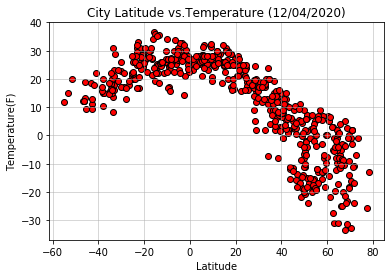

In [9]:
plt.scatter(city_df['Lat'],city_df['Max Temp'],facecolors = "red", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs.Temperature ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(linestyle='-', linewidth=1,alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

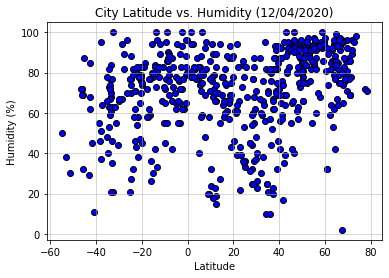

In [10]:
# Latitude vs. Humidity Scatter Plot 
plt.scatter(city_df["Lat"],city_df["Humidity"],facecolors = "blue", edgecolors ="black",marker ="o")
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

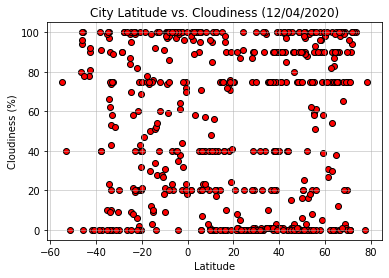

In [11]:
# Latitude vs. Cloudiness Scatter Plot
plt.scatter(city_df['Lat'],city_df['Cloudiness'],facecolors = "red", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

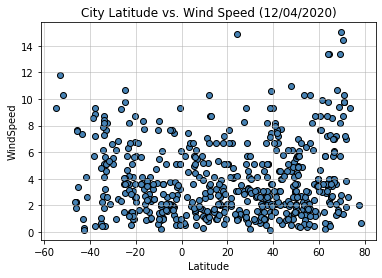

In [12]:
# Latitude vs. Wind Speed Scatter Plot 
plt.scatter(city_df["Lat"],city_df["Wind Speed"],facecolors = "steelblue", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_WindSpeed.png")

plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots

In [14]:
# Create Northern and Southern Hemisphere DataFrames
#northern Hemisphere Data frame 
N_df=city_df[city_df['Lat']>=0]


In [15]:
#Southern Hemisphere Data frame 
S_df=city_df[city_df['Lat']<0]
S_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hithadhoo,-0.60,73.08,28.12,79,72,9.29,MV,1607109734
3,bathurst,-33.42,149.58,8.33,84,10,0.45,AU,1607109626
4,atuona,-9.80,-139.03,25.70,72,21,8.33,PF,1607109734
7,puerto ayora,-0.74,-90.35,25.00,65,75,5.10,EC,1607109735
9,hobart,-42.88,147.33,11.00,62,90,1.00,AU,1607109501
...,...,...,...,...,...,...,...,...,...
541,noumea,-22.28,166.46,25.00,83,0,0.50,NC,1607109786
545,port-gentil,-0.72,8.78,27.00,88,20,5.10,GA,1607109787
546,mangaratiba,-22.96,-44.04,32.00,46,20,8.20,BR,1607109723
550,yulara,-25.24,130.99,28.00,21,84,1.50,AU,1607109787


In [16]:
# Print out the r-squared value along with the plot.
def linearplt(x_values,y_values,ytitle,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ytitle)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7339561166094186


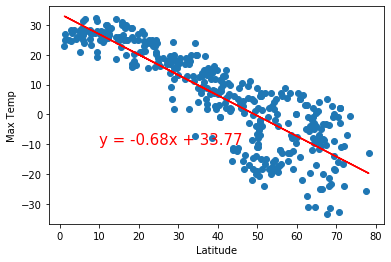

In [17]:
x_values=N_df['Lat']
y_values=N_df['Max Temp']
linearplt(x_values,y_values,"Max Temp",(10,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression